In [4]:
import lzma

In [5]:
import dill as pickle
import numpy as np
from corner import corner

In [6]:
import elm

In [9]:
with lzma.open("./walker.xz") as f:
    walker = pickle.load(f)

In [7]:
results = np.load("./result.npz")

In [34]:
n_chains, n_steps, n_params = results["model_chains"].shape
(n_chains, n_steps, n_params)

(64, 10000, 14)

In [30]:
steps_to_burn = 8000

In [31]:
x = results["model_chains"][:,steps_to_burn:,:].reshape((n_chains*(n_steps - steps_to_burn), n_params))

In [32]:
idxs = np.random.choice( np.arange(n_chains*(n_steps - steps_to_burn)), 10000)

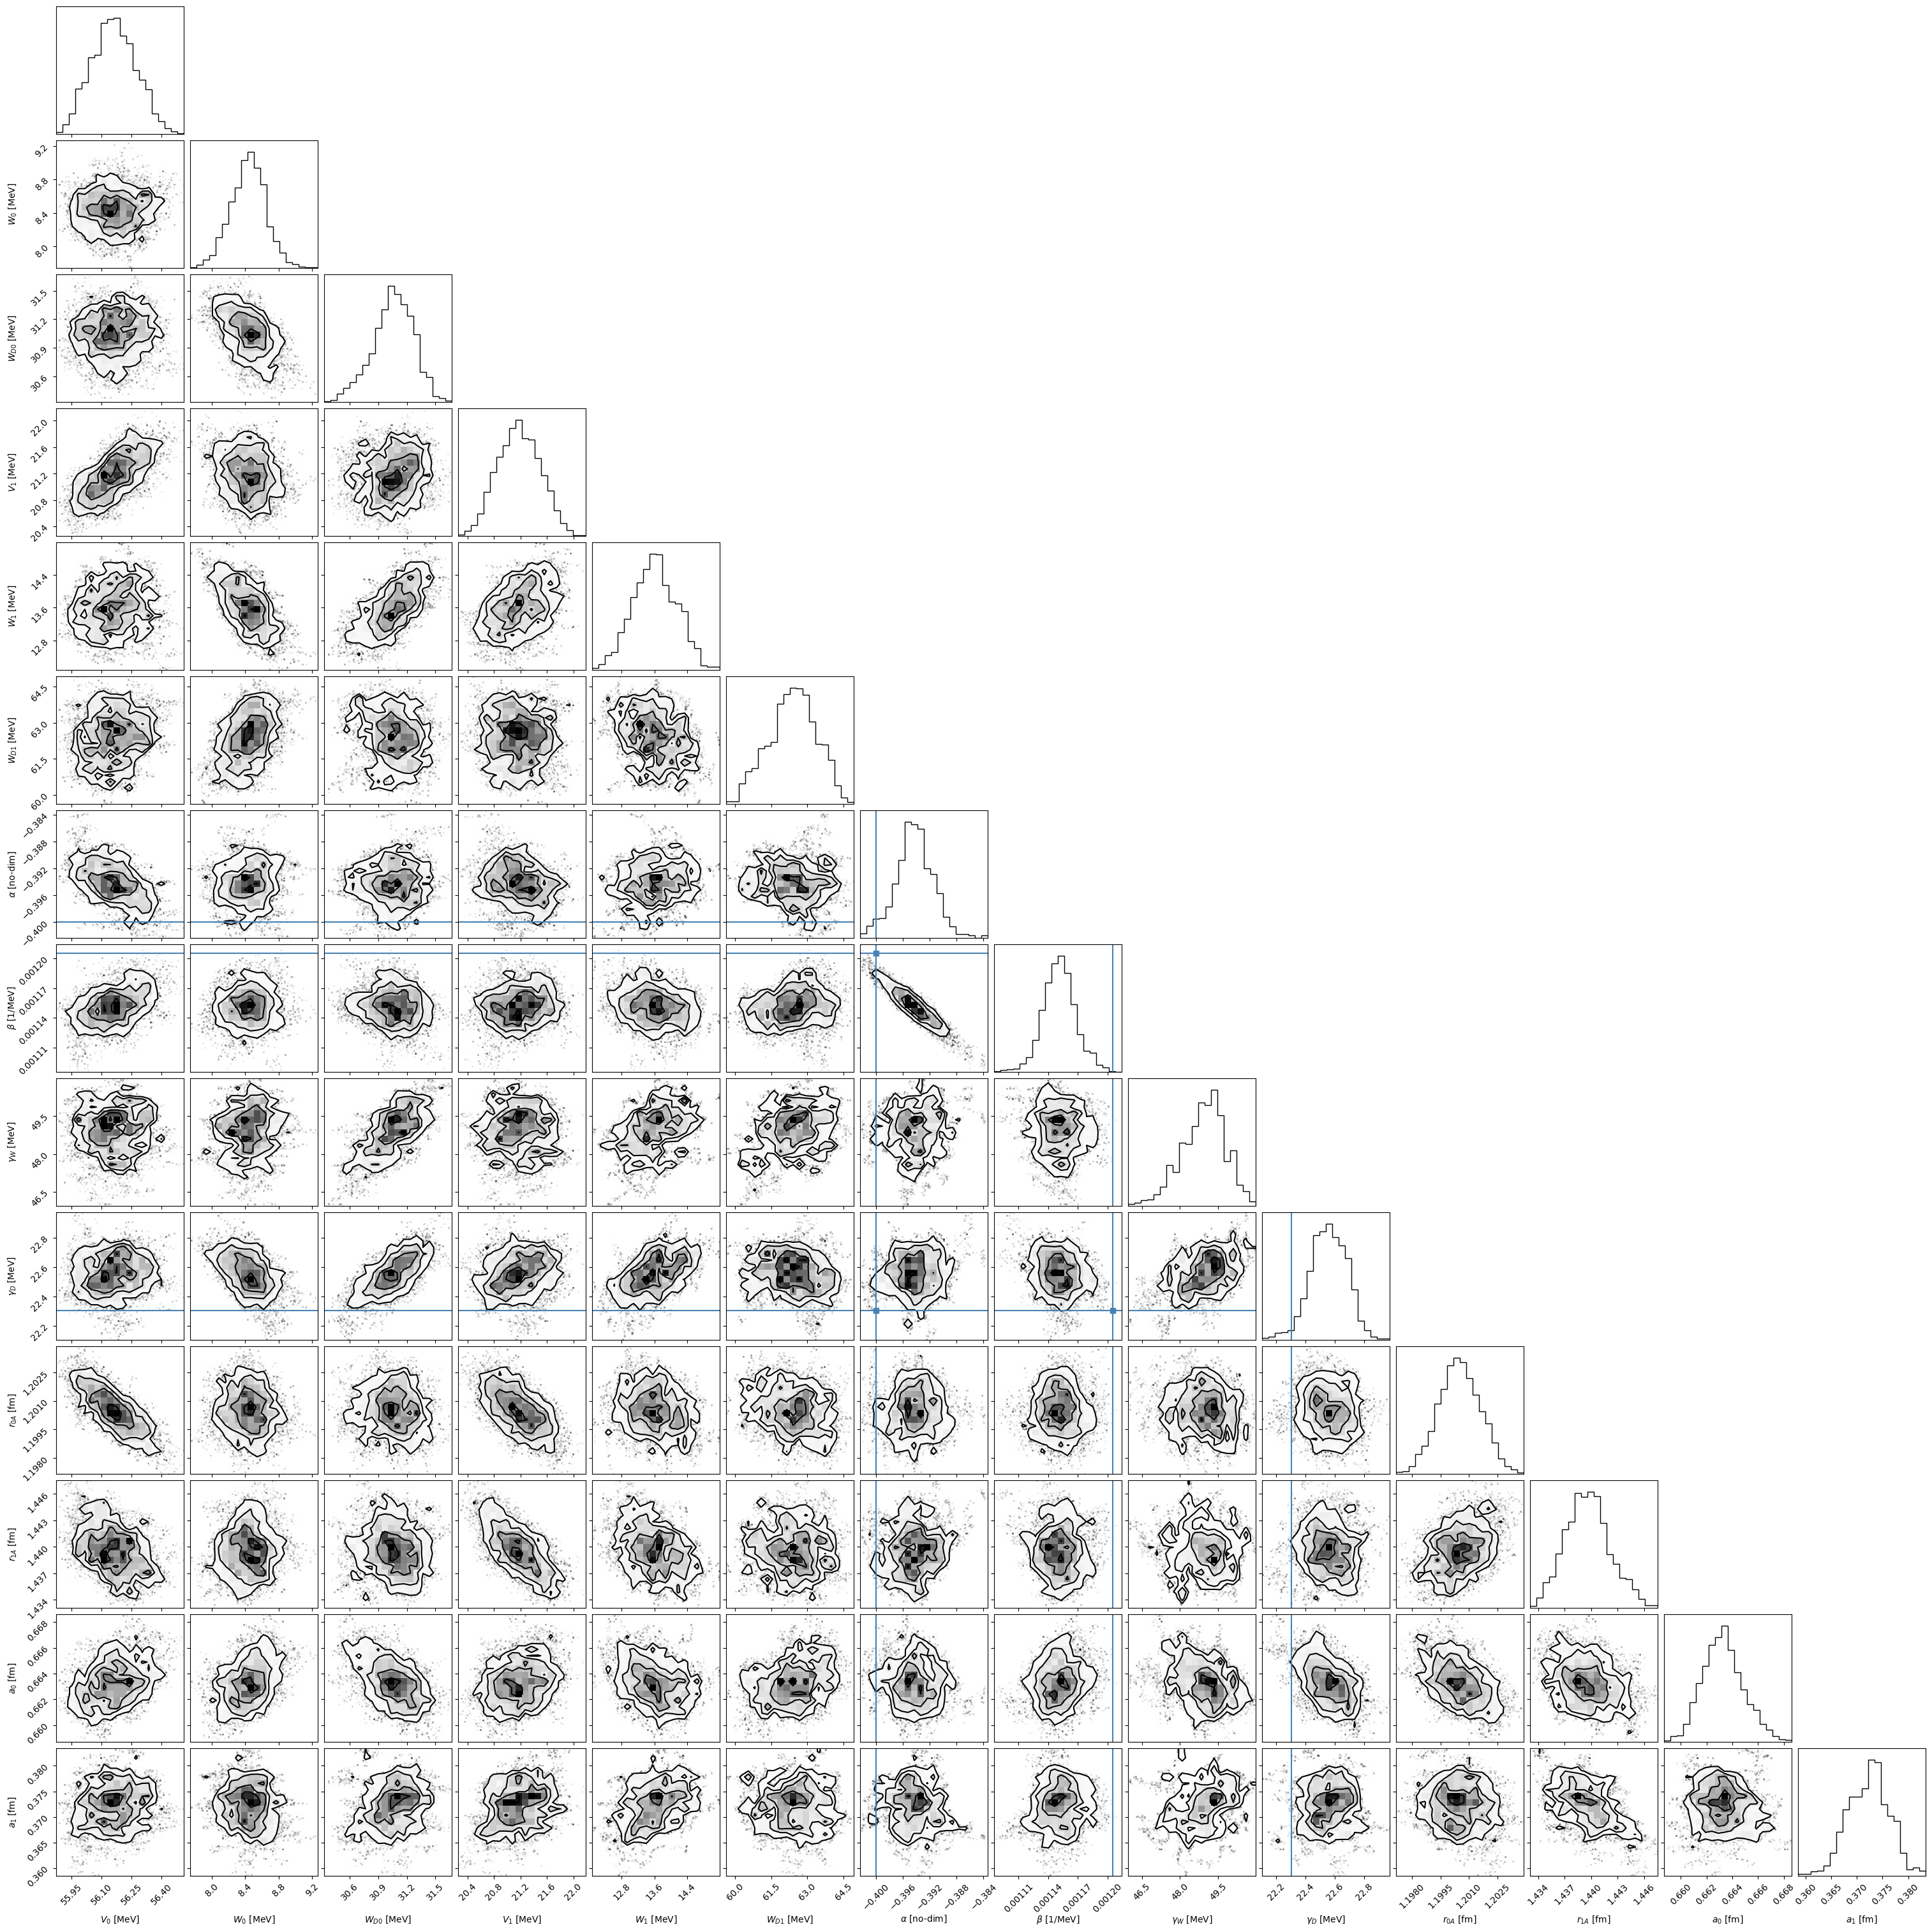

In [33]:
c = corner(
    x[idxs,:], labels=[f"${p.latex_name}$ [{p.unit}]" for p in elm.elm.params], truths=walker.model_sample_conf.starting_location,
)